Eb_No_dB=0.00, BER=6.8396e-02, Pe=7.8650e-02
Eb_No_dB=1.00, BER=5.5149e-02, Pe=5.6282e-02
Eb_No_dB=2.00, BER=4.1245e-02, Pe=3.7506e-02
Eb_No_dB=3.00, BER=2.6767e-02, Pe=2.2878e-02
Eb_No_dB=4.00, BER=1.1875e-02, Pe=1.2501e-02
Eb_No_dB=5.00, BER=5.4775e-03, Pe=5.9539e-03
Eb_No_dB=6.00, BER=2.4838e-03, Pe=2.3883e-03
Eb_No_dB=7.00, BER=7.9585e-04, Pe=7.7267e-04
Eb_No_dB=8.00, BER=1.7563e-04, Pe=1.9091e-04
Eb_No_dB=9.00, BER=3.9344e-05, Pe=3.3627e-05


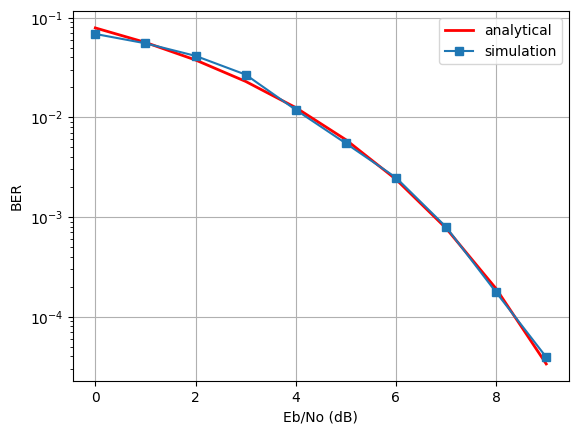

In [2]:
#!/usr/bin/python
# BPSK digital modulation example
# by Ivo Maljevic

from numpy import *
from scipy.special import erfc
import matplotlib.pyplot as plt

SNR_MIN     = 0
SNR_MAX     = 9
Eb_No_dB    = arange(SNR_MIN,SNR_MAX+1)
SNR         = 10**(Eb_No_dB/10.0)  # linear SNR

Pe          = empty(shape(SNR))
BER         = empty(shape(SNR))

loop = 0
for snr in SNR:      # SNR loop
 Pe[loop] = 0.5*erfc(sqrt(snr))
 VEC_SIZE = int(ceil(100/Pe[loop]))  # vector length is a function of Pe

 # signal vector, new vector for each SNR value
 s = 2*random.randint(0,high=2,size=VEC_SIZE)-1

 # linear power of the noise; average signal power = 1
 No = 1.0/snr

 # noise
 n = sqrt(No/2)*random.randn(VEC_SIZE)

 # signal + noise
 x = s + n

 # decode received signal + noise
 y = sign(x)

 # find erroneous symbols
 err = where(y != s)
 error_sum = float(len(err[0]))
 BER[loop] = error_sum/VEC_SIZE
 print('Eb_No_dB=%4.2f, BER=%10.4e, Pe=%10.4e' % \
        (Eb_No_dB[loop], BER[loop], Pe[loop]))

 loop += 1

#plt.semilogy(Eb_No_dB, Pe,'r',Eb_No_dB, BER,'s')
plt.semilogy(Eb_No_dB, Pe,'r',linewidth=2)
plt.semilogy(Eb_No_dB, BER,'-s')
plt.grid(True)
plt.legend(('analytical','simulation'))
plt.xlabel('Eb/No (dB)')
plt.ylabel('BER')
plt.show()